In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0


In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [16]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
data.data.shape

(569, 30)

In [18]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [19]:
data.target.shape

(569,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build the model 

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D,)), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 3ms/sample - loss: 0.8072 - accuracy: 0.4751 - val_loss: 0.7175 - val_accuracy: 0.5638
Epoch 2/100
381/381 [==============================] - 0s 95us/sample - loss: 0.7377 - accuracy: 0.5459 - val_loss: 0.6535 - val_accuracy: 0.6223
Epoch 3/100
381/381 [==============================] - 0s 102us/sample - loss: 0.6778 - accuracy: 0.5984 - val_loss: 0.5990 - val_accuracy: 0.6809
Epoch 4/100
381/381 [==============================] - 0s 120us/sample - loss: 0.6244 - accuracy: 0.6483 - val_loss: 0.5537 - val_accuracy: 0.7181
Epoch 5/100
381/381 [==============================] - 0s 94us/sample - loss: 0.5801 - accuracy: 0.6824 - val_loss: 0.5151 - val_accuracy: 0.7447
Epoch 6/100
381/381 [==============================] - 0s 86us/sample - loss: 0.5416 - accuracy: 0.7192 - val_loss: 0.4820 - val_accuracy: 0.7979
Epoch 7/100
381/381 [==============================] - 0s 97us/sample - loss:

381/381 [==============================] - 0s 105us/sample - loss: 0.1572 - accuracy: 0.9449 - val_loss: 0.1429 - val_accuracy: 0.9415
Epoch 57/100
381/381 [==============================] - 0s 105us/sample - loss: 0.1556 - accuracy: 0.9449 - val_loss: 0.1413 - val_accuracy: 0.9415
Epoch 58/100
381/381 [==============================] - 0s 92us/sample - loss: 0.1540 - accuracy: 0.9449 - val_loss: 0.1397 - val_accuracy: 0.9415
Epoch 59/100
381/381 [==============================] - 0s 94us/sample - loss: 0.1524 - accuracy: 0.9475 - val_loss: 0.1383 - val_accuracy: 0.9415
Epoch 60/100
381/381 [==============================] - 0s 89us/sample - loss: 0.1510 - accuracy: 0.9475 - val_loss: 0.1368 - val_accuracy: 0.9415
Epoch 61/100
381/381 [==============================] - 0s 88us/sample - loss: 0.1495 - accuracy: 0.9501 - val_loss: 0.1354 - val_accuracy: 0.9415
Epoch 62/100
381/381 [==============================] - 0s 91us/sample - loss: 0.1482 - accuracy: 0.9501 - val_loss: 0.1339 - val

Train score:  [0.11334922886270238, 0.9632546]
188/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

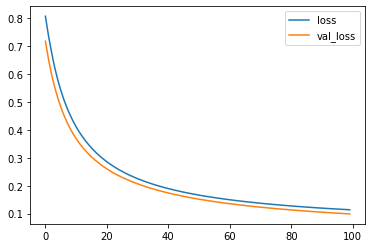

In [22]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

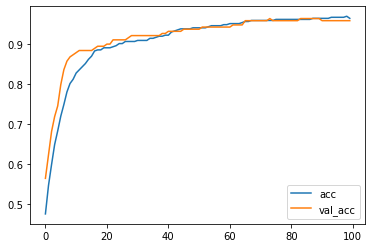

In [25]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()